In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from maxima import findLocalMaximaMinima
import scipy.signal
import scipy
import librosa 
import IPython.display as ipd
from detect_peaks import detect_peaks

In [128]:
#Load a .wav file
x, sr = librosa.load('D:\\Programowanie\\AI\\editor\\data\\samples\\inputs\\africa-toto.wav')
# x, sr = librosa.load('D:\\Programowanie\\AI\\editor\\data\\samples\\inputs\\file_example_WAV_1MG.wav')

print('x length = {}'.format(len(x)))
print('sample rate = {}'.format(sr))
print('sound clip is {} seconds long' .format(int((len(x)/sr))))

x length = 6570432
sample rate = 22050
sound clip is 297 seconds long


In [146]:
indexes = detect_peaks(x, mph = 0.8, mpd=10000)
print('Peaks are: %s' % (indexes))
print(len(indexes))

Peaks are: [   6521   21030   34978   49400   63561   78084   92018  106430  120603
  135109  149056  163477  177640  192151  206099  220522  234675  249191
  263134  277559  291722  306232  320181  334602  348756  363556  377513
  391948  405804  420609  434271  448686  463127  477380  491574  505742
  519902  534439  548364  562783  577550  591463  605414  620153  634001
  648508  662457  676879  691044  705578  719495  734213  748086  762423
  776545  790965  805118  819934  833590  848010  862425  876692  890903
  905062  919220  933754  947686  962131  976262  990791 1004740 1019472
 1033336 1047870 1061799 1076215 1090392 1104926 1118858 1133273 1147443
 1161972 1175913 1190601 1204493 1219323 1233258 1247373 1261567 1276365
 1290032 1304458 1318618 1333436 1347375 1361519 1375679 1390212 1404150
 1432736 1447538 1461495 1475643 1490049 1504349 1518549 1546823 1563016
 1575343 1589797 1604535 1618758 1632665 1643277 1668221 1689476 1703938
 1718060 1732626 1746551 1761287 1775104

In [ ]:
#audio from peaks
sample = x
for index in indexes:
    x[index] = 100

m = np.max(np.abs(sample))
sigf32 = (sample/m).astype(np.float32)
write("detect_peaks.wav", sr , sigf32)
plt.plot(t,sigf32)

In [76]:
#np.array of seconds
t = np.array(range(0, len(x))) /sr
print(t)

[0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 2.97978639e+02
 2.97978685e+02 2.97978730e+02]


Text(0, 0.5, 'Pressure')

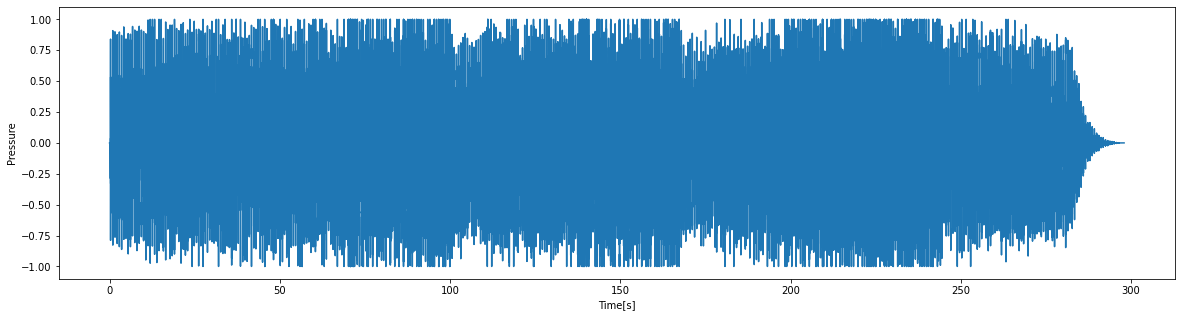

In [77]:
plt.figure(figsize=(20,5))
plt.plot(t,x)
plt.xlabel('Time[s]')
plt.ylabel('Pressure')

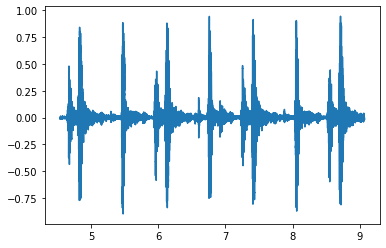

In [78]:
plt.plot(t[100000:200000], x[100000:200000])

In [79]:
#compute the FFT
fhat = np.fft.fft(x)

In [80]:
print("Biggest value in fft {}".format(max(abs(fhat))))
print("Samllest value in fft {}".format(min(abs(fhat))))
print('Median of power {}'.format(np.median(abs(fhat))))

Biggest value in fft 14079.860974615276
Samllest value in fft 0.08264643599854403
Median of power 93.51353910882978


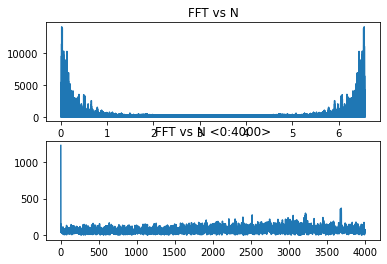

In [81]:
fig,axs = plt.subplots(2,1)
plt.sca(axs[0])
plt.title('FFT vs N')
plt.plot(abs(fhat))
plt.sca(axs[1])
plt.title('FFT vs N <0:4000>')
plt.plot(abs(fhat[0:4000]))

Text(0, 0.5, 'Power Db')

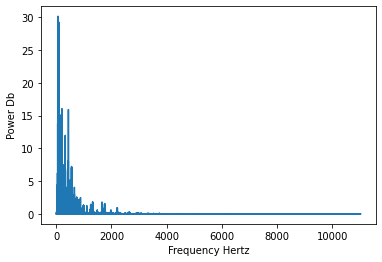

In [82]:
#plot PSD
PSD = fhat * np.conj(fhat)/len(x)
L = int(len(x)/2)
freqs = (1/(t[1]*len(t))) * np.arange(len(t))
plt.plot(freqs[0:L],PSD[0:L])
plt.xlabel('Frequency Hertz')
plt.ylabel('Power Db')

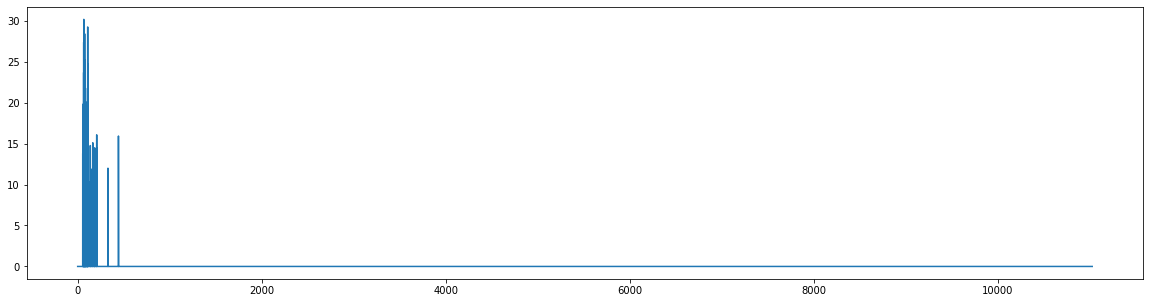

In [83]:
indices = PSD >10  #find dominant sound
PSDclean = PSD * indices #zero out all other
fhat = indices * fhat
# i = 0
# for indx in indices:
#     if(indx == False):
#         i = i+1
# print(i)
ffilt = np.fft.ifft(fhat)
plt.figure(figsize=(20,5))
plt.plot(freqs[0:L],PSDclean[0:L])



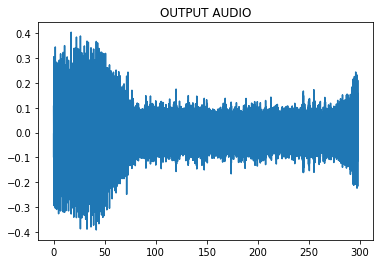

In [84]:
plt.title('OUTPUT AUDIO')
plt.plot(t,ffilt)


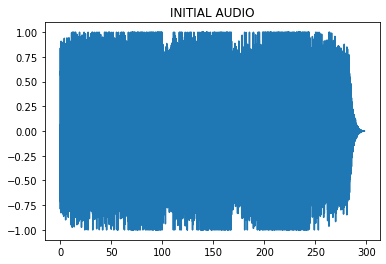

In [85]:
plt.title('INITIAL AUDIO')
plt.plot(t,x)

In [86]:
    #indeksy sub_bassowych czestotliwosc
    # print("\nThe len of sub_bass is equal to {}".format(len(sub_bass_indices)))
    # print("The length of audio is = {}".format(len(x)))
    # print("filtered sound is {:.1%} of the original".format(len(sub_bass_indices)/len(x)))
    # print("\nThe value of first five indices is = {}".format(sub_bass_indices[0:5]))
    # local_maximas = findLocalMaximaMinima(len(sub_bass_indices),sub_bass_indices)

The length of audio is = 95591
[0. 0. 0. ... 0. 0. 0.]


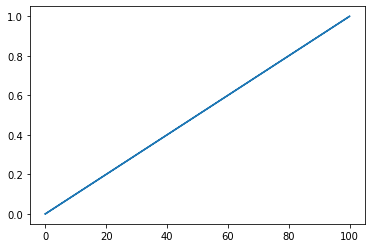

In [87]:
    audio = [(idx,val) for idx,val in enumerate(abs(ffilt))]
    local_maximas = findLocalMaximaMinima(len(audio),audio)
    print("The length of audio is = {}".format(len(local_maximas)))
    test_output = np.zeros(len(x))
    sorted_by_val = sorted(local_maximas, key=lambda tup: tup[1])
    sorted_by_val = sorted_by_val[0:400]
    print(test_output)
    for maximum in sorted_by_val:
        index = maximum[0]
        value = 100
        test_output[index] = value
    
    m = np.max(np.abs(test_output))
    sigf32 = (test_output/m).astype(np.float32)
    write("audio_output.wav", sr , sigf32)
    plt.plot(test_output,sigf32) 
         



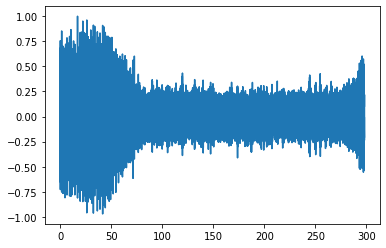

In [88]:
#IFFT AUDIO
m = np.max(np.abs(ffilt))
sigf32 = (ffilt/m).astype(np.float32)
write("audio_output.wav", sr , sigf32)
plt.plot(t,sigf32)


The length of audio is = 1369138
[0. 0. 0. ... 0. 0. 0.]


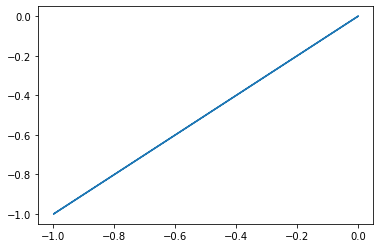

In [89]:
#local maxima of raw file
audio = [(idx,val) for idx,val in enumerate(x)]
local_maximas = findLocalMaximaMinima(len(audio),audio)
print("The length of audio is = {}".format(len(local_maximas)))
test_output = np.zeros(len(x))
print(test_output)
sorted_by_val = sorted(local_maximas, key=lambda tup: tup[1])
sorted_by_val = sorted_by_val[0:100]

for maximum in sorted_by_val:
    index = maximum[0]
    value = maximum[1]
    test_output[index] = value

m = np.max(np.abs(test_output))
sigf32 = (test_output/m).astype(np.float32)
write("audio_output.wav", sr , sigf32)
plt.plot(test_output,sigf32) 